### Multiclass Classification


In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools

In [12]:
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
labels_name = ["Tshirts/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

## Random Data Visualization

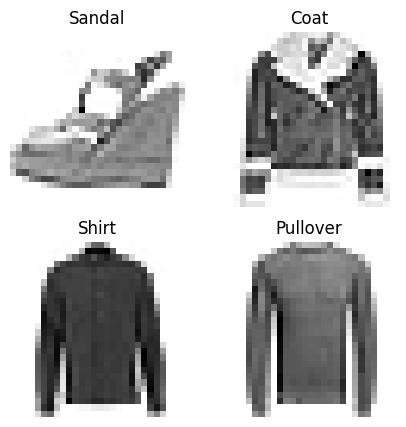

In [15]:
choice = []
for i in range(4):
    choice.append(random.randint(0,len(train_data)))
plt.figure(figsize=(5,5))

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(train_data[choice[i]], cmap=plt.cm.binary)
    plt.title(labels_name[train_labels[choice[i]]])
    plt.axis(False)


### Let's Create a Model


In [16]:
## Model 1 


# Set Random seed 

tf.random.set_seed(42)

# Sequential API

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="softmax")
])

# Model Compilation

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Model Callback - used for best learning rate 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/ 20))

# Model Fitting 

model1.fit(train_data, train_labels, epochs=5,
          validation_data=[lr_scheduler],
          callbacks=[lr_scheduler])

Epoch 1/5


ValueError: in user code:

    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((32, 28, 1) vs (32,)).


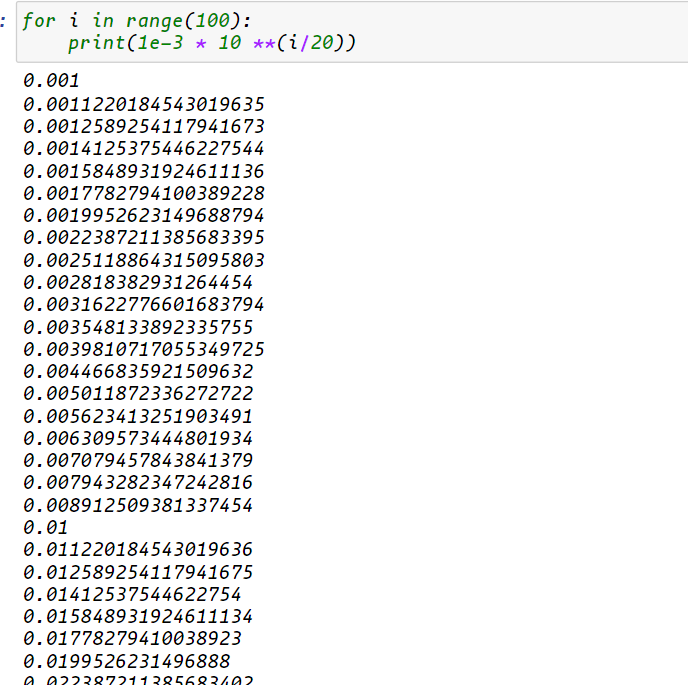

***Error occured due to wrong input & output shape**
- Input shape should be flatten or use one-hot-encoding


## Model 1 Updation

In [17]:
## Model 1


# Set Random seed 

tf.random.set_seed(42)

# Sequential API

model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Model Compilation

model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Model Callback - used for best learning rate 

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/ 20))

# Model Fitting 

model1.fit(train_data, train_labels, epochs=5, validation_data=(test_data, test_labels))

Epoch 1/5


ValueError: in user code:

    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\heysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


***Still, the model is not well-fit, becoz we flatten the input but not used one-hot encoding***

- Either we can one-hot encode the input data
- we can use ***SparseCategoricalBinaryCrossEntropy()*** 
- Or we can use one hot encoding of the label data

```py
a = [1,2,23,1,34,13,43,255]
max_val = a.max()
for i in range(len(a)):
   a[i] = a[i] / max_val
```



In [19]:
## Model 1 Updation


# Set Random seed 

tf.random.set_seed(42)

# Sequential API

model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Model Compilation

model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Model Callback - used for best learning rate 

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/ 20))

# Model Fitting 

model1.fit(train_data, tf.one_hot(train_labels,depth=10), epochs=5, 
           validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 2.4513 - accuracy: 0.0998 - val_loss: 2.3011 - val_accuracy: 0.1017
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2830 - accuracy: 0.1100 - val_loss: 2.2393 - val_accuracy: 0.1318
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2217 - accuracy: 0.1373 - val_loss: 2.2162 - val_accuracy: 0.1366
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.1204 - accuracy: 0.1605 - val_loss: 2.1064 - val_accuracy: 0.1757
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.0800 - accuracy: 0.1705 - val_loss: 2.0642 - val_accuracy: 0.1753


In [182]:
## Model 1 Updation


# Set Random seed 

tf.random.set_seed(42)

# Sequential API

model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Model Compilation

model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Model Callback - used for best learning rate 

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/ 20))

# Model Fitting 

model1.fit(train_data, (train_labels), epochs=5, 
           validation_data=(test_data, (test_labels)))

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 2.2765 - accuracy: 0.1482 - val_loss: 1.9873 - val_accuracy: 0.2178
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.8572 - accuracy: 0.2542 - val_loss: 1.7772 - val_accuracy: 0.2657
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6403 - accuracy: 0.3134 - val_loss: 1.5398 - val_accuracy: 0.3246
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5116 - accuracy: 0.3304 - val_loss: 1.5049 - val_accuracy: 0.3404
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4709 - accuracy: 0.3369 - val_loss: 1.4583 - val_accuracy: 0.3418


In [190]:
## Model 2 


# Set Random seed 

tf.random.set_seed(42)

# Sequential API

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Model Compilation

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Model Callback - used for best learning rate 

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/ 20))

# Model Fitting 

model2.fit(train_data, tf.one_hot(train_labels,depth=10), epochs=5,
           validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 1.9041 - accuracy: 0.1971 - val_loss: 1.6484 - val_accuracy: 0.2461
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6387 - accuracy: 0.2659 - val_loss: 1.6474 - val_accuracy: 0.2708
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5932 - accuracy: 0.2874 - val_loss: 1.5817 - val_accuracy: 0.2688
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5721 - accuracy: 0.2939 - val_loss: 1.5769 - val_accuracy: 0.2721
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5480 - accuracy: 0.2992 - val_loss: 1.5799 - val_accuracy: 0.2836


In [184]:
model1.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 784)               0         
                                                                 
 dense_78 (Dense)            (None, 4)                 3140      
                                                                 
 dense_79 (Dense)            (None, 4)                 20        
                                                                 
 dense_80 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [191]:
model2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_90 (Dense)            (None, 4)                 3140      
                                                                 
 dense_91 (Dense)            (None, 4)                 20        
                                                                 
 dense_92 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


#### Data Normalization

In [23]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

# Model 3

In [32]:
# Random Seed 
tf.random.set_seed(42)

# Sequential API 
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(train_data[0].shape)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(len(labels_name), activation=tf.keras.activations.softmax)
])

# Model Compilation

model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Callback for better Learning Rate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10 ** (epoch/20))


"""
Batch Size -  number of samples processed before the model is updated.

"""
batch_size = 32

import math
n_batches = math.ceil(len(train_data)/ batch_size)

# Callback for saving the model i.e Checkpoints

model3_cp = tf.keras.callbacks.ModelCheckpoint(filepath="models/",
                                              verbose=1,
                                              save_weights_only=True,
                                              save_freq= 5 * n_batches)

# Model fitting 

history3 = model3.fit(train_data_norm,
          tf.one_hot(train_labels, depth=len(labels_name)),
          callbacks=[lr_scheduler, model3_cp],
          batch_size= batch_size,
          validation_data=(test_data_norm, 
                           tf.one_hot(test_labels, 
                           depth=len(labels_name))),
           epochs=20,
           verbose=0
          )



Epoch 5: saving model to models\

Epoch 10: saving model to models\

Epoch 15: saving model to models\

Epoch 20: saving model to models\


In [33]:
model3.save('models/model3.h5')
model3.save_weights("models/model3_weights.h5")

In [34]:
# For loading the model 

model_load = tf.keras.models.load_model("models/model3.h5")
model_load.load_weights("models/model3_weights.h5")

In [236]:
import pandas as pd

In [35]:
def modelAccuracy(hist):
    acc = hist.history["accuracy"][-1] * 100 
    print(f"Model accuracy is :: {acc} %")

In [36]:
modelAccuracy(history3) 

Model accuracy is :: 81.08500242233276 %


<Axes: title={'center': 'Normalization'}>

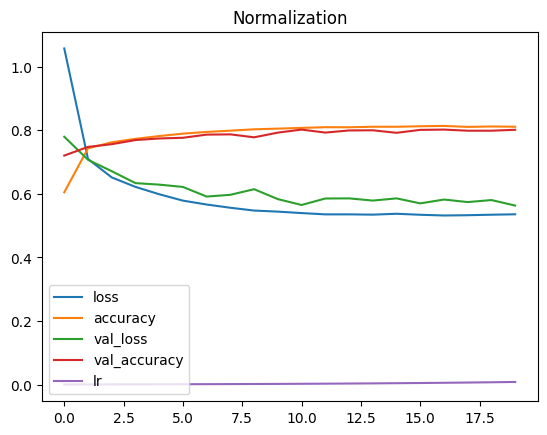

In [37]:
pd.DataFrame(history3.history).plot(title="Normalization")

In [240]:
# Model 4

In [243]:
# Random Seed 
tf.random.set_seed(42)

# Sequential API 
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(train_data[0].shape)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(len(labels_name), activation=tf.keras.activations.softmax)
])

# Model Compilation

model4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Callback for better Learning Rate

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10 ** (epoch/20))

# Model fitting 

history4 = model4.fit(train_data_norm,
          tf.one_hot(train_labels, depth=len(labels_name)),
          callbacks=[lr_scheduler],
          batch_size= batch_size,
          validation_data=(test_data_norm, 
                           tf.one_hot(test_labels, 
                           depth=len(labels_name))),
           epochs=10,
           verbose=0
          )


<Axes: title={'center': 'Normalized Data with learning rate'}>

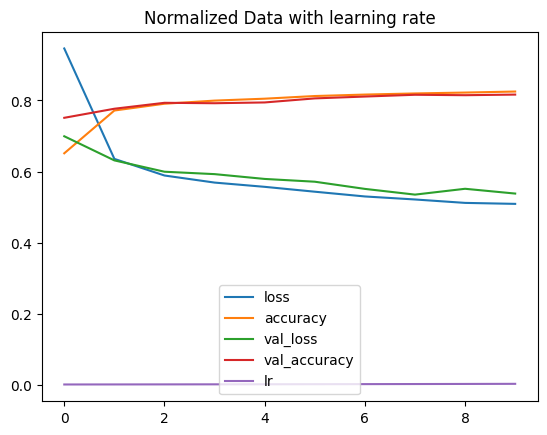

In [244]:
pd.DataFrame(history4.history).plot(title="Normalized Data with learning rate")

In [261]:
modelAccuracy(history4)

Model accuracy is :: 82.51000046730042 %


In [268]:
# These are just probabilities. We need to change it to percentage
# Note: While training the model, use the same type of data that is used for training the model
print("""
Model is trained using normalized data, For prediction use normalized data
""")


Model is trained using normalized data, For prediction use normalized data



In [265]:
y_probs = model4.predict(test_data_norm) 

313/313 [==============================] - 1s 3ms/step


### Predicting from probability

In [275]:
# Changing prob to selection of objects
# Use argmax to find the highest probability.

y_predict_ = np.argmax(y_probs, axis=1) # axis =1 -> max is selected from columns, 0 -> from rows


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [262]:
## Let's Create Visual Confusion Matrix

In [263]:
import itertools
from sklearn.metrics import confusion_matrix

In [42]:
def genConfusionMatrix(y_predict, y_true, classes=None, fig_size=(15,15), font_size=10):
    '''
    If classes names are passed names will be displayed at left & bottom of confusion matrix
    else number will be displayed
    '''
    cm = confusion_matrix(y_true, y_predict)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # means columns sum of every row , then take transpose
    n_classes = cm.shape[0] # find the number of classes we're dealing with
    ticks = np.arange(n_classes)

    # Plotting of the figure
    fig, ax = plt.subplots(figsize=fig_size)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    # If classes 
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)
    
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=ticks,
          yticks=ticks,
          xticklabels=labels,
          yticklabels=labels)
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Color Threshold
    threshold = (cm.max() + cm.min()) / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=font_size)
    

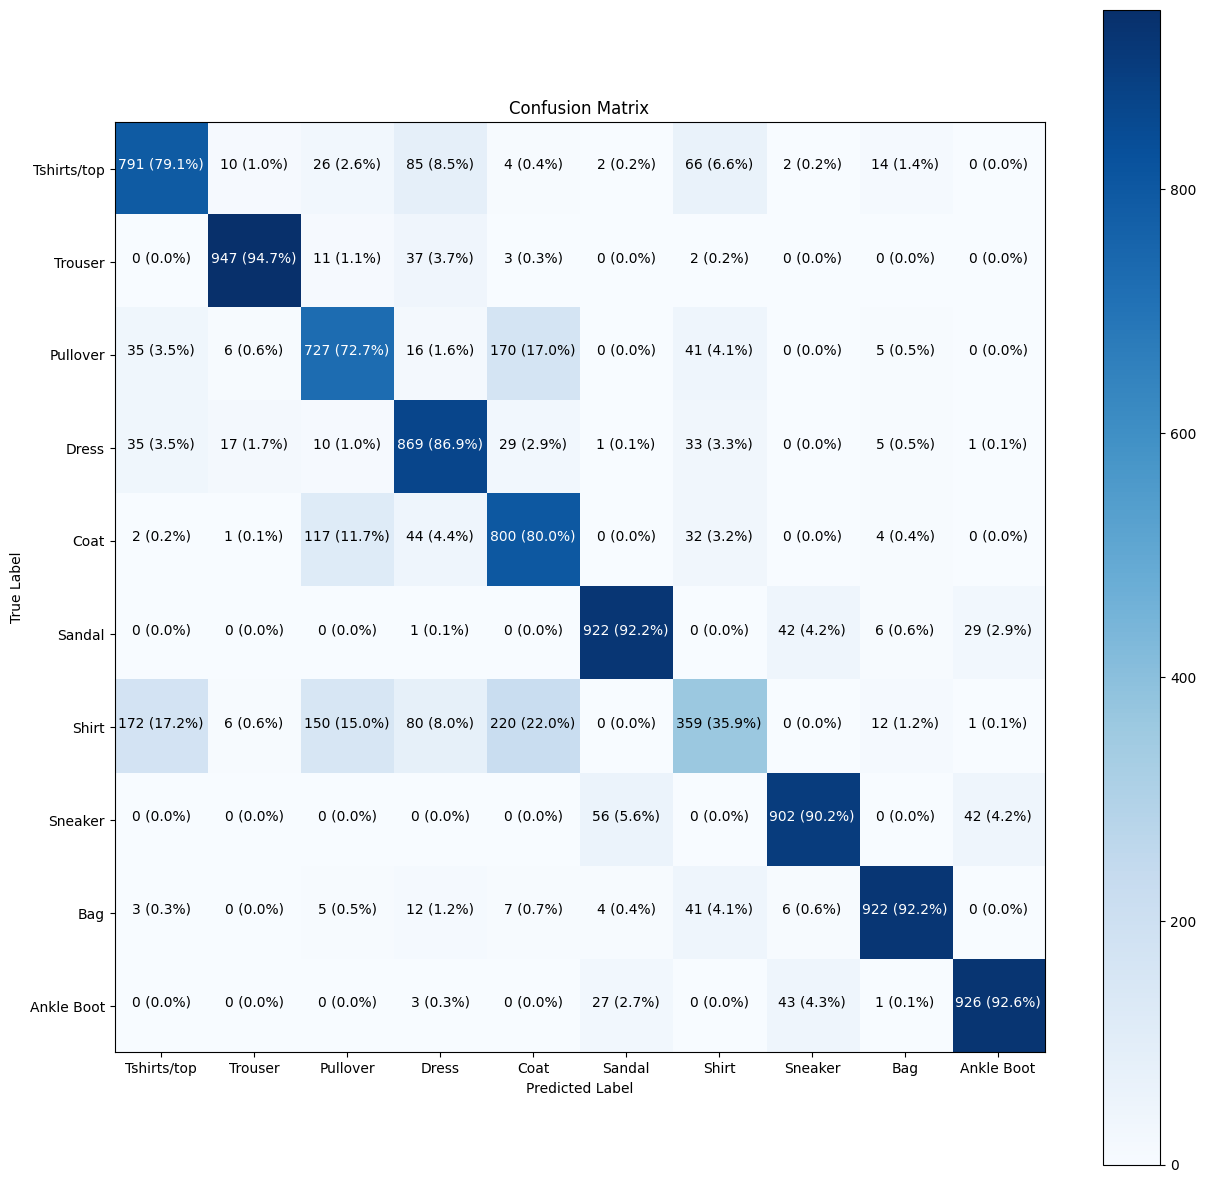

In [387]:
genConfusionMatrix(y_predict_, test_labels, labels_name)

In [345]:
cm = confusion_matrix(test_labels, y_predict_) # True_value, predicted_value
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it and newaxis is transpose 

In [300]:
cm = confusion_matrix(test_labels, y_predict_) # True_value, predicted_value
norm_cm = cm.astype("float") / (cm.sum(axis=1)[:, np.newaxis]) # means columns sum of every row , then take transpose
norm_cm.shape[0]
cm.shape[0]

10

In [24]:
# Model5 

# Random Seed 
tf.random.set_seed(42)

# Sequential API 
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(train_data[0].shape)),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(len(labels_name), activation=tf.keras.activations.softmax)
])

# Model Compilation

model5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Model fitting 

history5 = model5.fit(train_data_norm,
          tf.one_hot(train_labels, depth=len(labels_name)),
          validation_data=(test_data_norm, 
                           tf.one_hot(test_labels, 
                           depth=len(labels_name))),
           epochs=10,
           verbose=0
          )


In [25]:
model5.save_weights("models/model5_weights.h5")

<Axes: title={'center': 'Normalization'}>

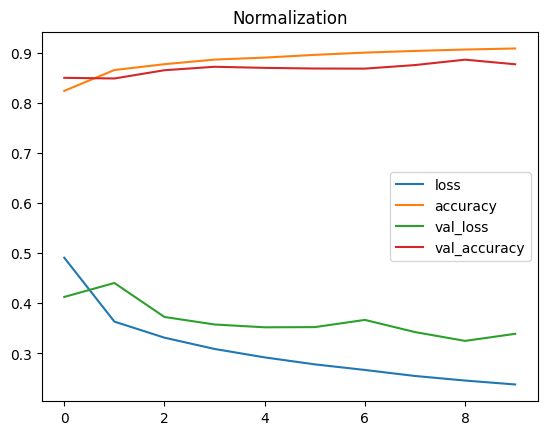

In [28]:
pd.DataFrame(history5.history).plot(title="Normalization")

In [38]:
modelAccuracy(history5)

Model accuracy is :: 90.94666838645935 %


In [39]:
y_probs5 = model5.predict(test_data_norm)

313/313 [==============================] - 1s 4ms/step


In [40]:
y_pred5 = np.argmax(y_probs5, axis=1)

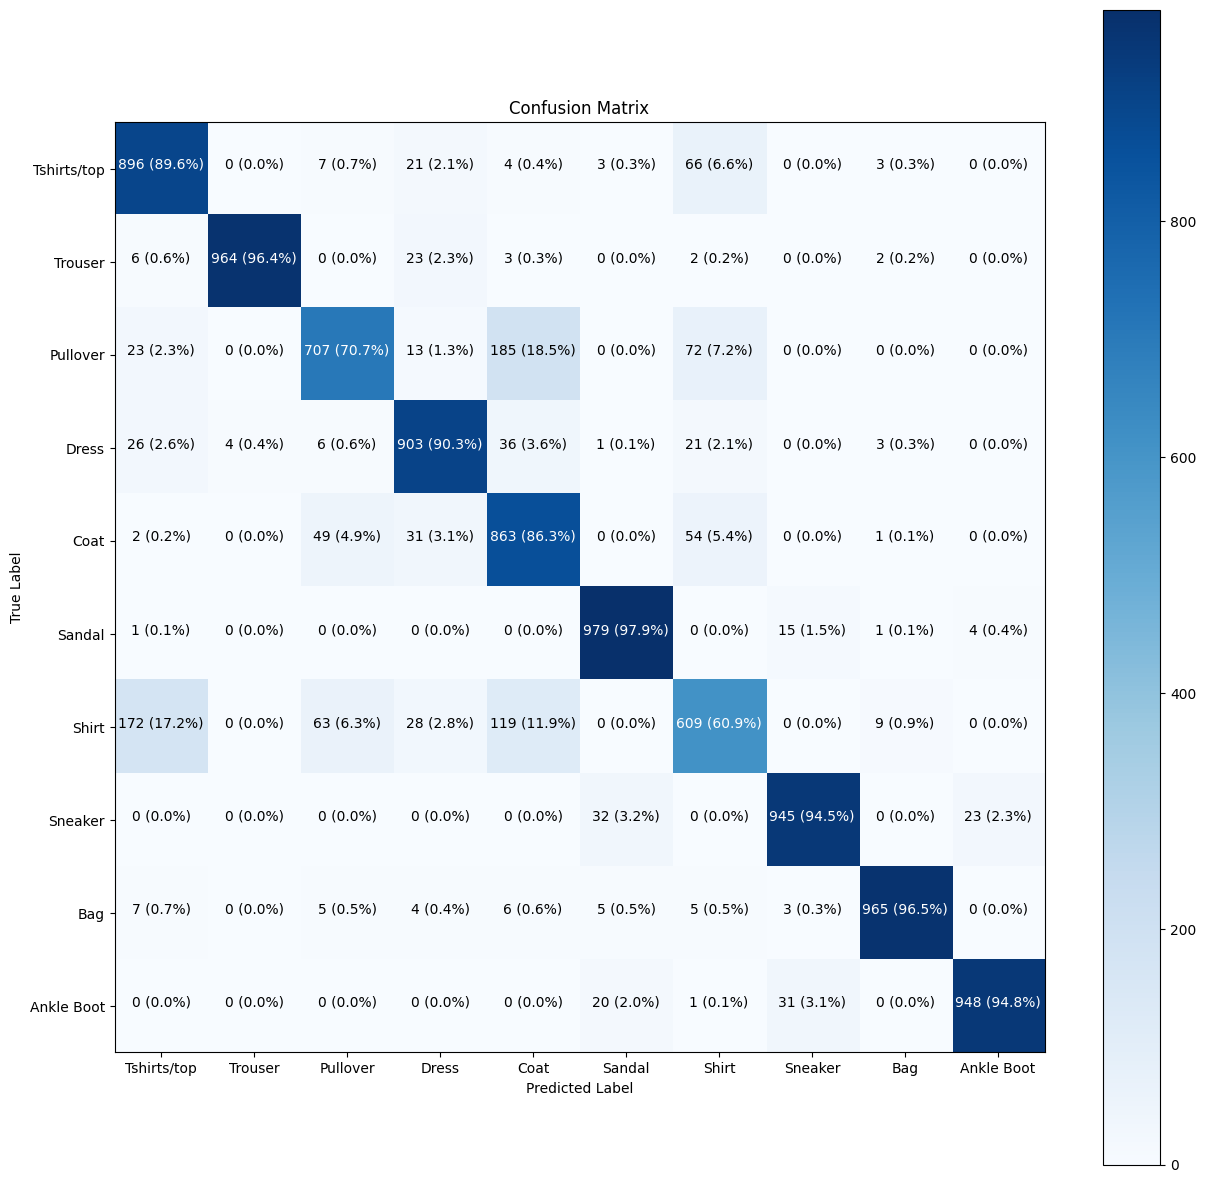

In [47]:
genConfusionMatrix(y_true=test_labels, y_predict=y_pred5, classes=labels_name)

## Let's Create a function that makes random selection & verifys the prediction

***Approach***

    - Randomly generate a number within the range of test data
    - Get the true value from test_labels
    - Similarly, get the predicted value from y_pred
    - Plot the graph with title as name of the object

In [48]:
test_data.shape[0]

10000

In [51]:
def randomSelection(model_, y_true, test_data,labels_name):

    import random
    choice = random.randint(0, test_data.shape[0])
    print(choice)
    sel = y_true[choice]
    pred = test_data[choice]

    # Probability & Prediction
    y_probs = model_.predict(pred.reshape(1,28,28))
    y_preds = labels_name[np.argmax(y_probs)]

    if y_preds == labels_name[sel]: color = "green"
    else: color = "red"
    plt.title(f"Prdicted {y_preds} {y_probs.max() * 100} %", color=color)
    plt.imshow(pred, cmap=plt.cm.binary)

604
1/1 [==============================] - 0s 67ms/step


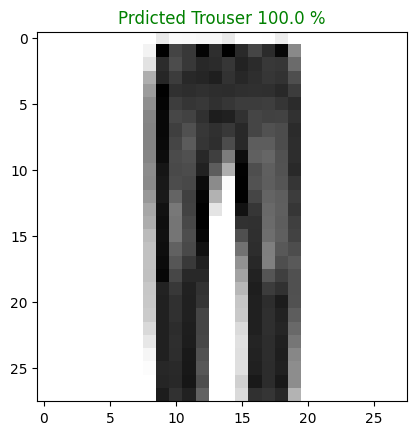

In [52]:
randomSelection(model5,test_labels, test_data_norm,labels_name)